In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-depression-dataset/Student Depression Dataset.csv


In [2]:
data = pd.read_csv("/kaggle/input/student-depression-dataset/Student Depression Dataset.csv")
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [3]:
#shows all the columns without limiting when displayed
pd.set_option('display.max_columns', None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
data.isnull().sum().sum()

3

In [6]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


Here i have used a for loop to read all the columns in the datafarame 'data', but still it will ignore the columns in the ignore_cols list as they have unique values for most of the instances it is of no use to get the unique values of these columns. For other columns this code will display all the uniques values. 

In [7]:
for column in data.columns:
    ignore_cols=['id','Age','CGPA']
    if column not in ignore_cols:
        print(column,data[column].unique())
        print('-'*20)

Gender ['Male' 'Female']
--------------------
City ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
--------------------
Profession ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
--------------------
Academic Pressure [5. 2. 3. 4. 1. 0.]
--------------------
Work Pressure [0. 5. 2.]
--------------------
Study Satisfaction [2. 5. 3. 4. 1. 0.]
--------------------
Job Satisfaction [0. 3. 

When refering the unique values the, Financial Stress column have 'nan' or missing values. These values need replacing. Also the unique values of the City column has some values which are not relevant to city. E.g - Less than 5 Kalyan. These values also need replacing as they act like outliers. Below code is used to address this issue.

In [8]:
data['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

Inorder to remove the values I have used .isin function and if the value is in the ignore_rows column then the index of the item is added to the row_index array.

Then the .drop function is used to remove the rows from the dataset. 

In [9]:
ignore_rows = ['City','Harsha','Saanvi','Less than 5 Kalyan','3.0','ME','Mira','Bhavna','Less Delhi','M.Tech','Vaanya','Gaurav','Harsh','Reyansh','Kibara','Rashi','M.com','Nalyan','Mihir','Nalini','Nandini','Khaziabad','M.Com']
row_index = data.index[data['City'].isin(ignore_rows)].tolist()
print(row_index)
data = data.drop(row_index)

[4445, 5697, 5748, 6010, 6830, 7021, 7355, 7715, 8730, 12618, 12847, 13545, 13899, 14057, 14561, 17125, 18377, 21524, 22682, 22961, 24008, 24552, 24744, 25133, 25154, 26317]


In [10]:
data['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

Since we saw that the Financial Stress column had some missing values now i am checking the count of missing values in the whole Financial Stress column.

In [11]:
data['Financial Stress'].isnull().sum()

3

Now I am filling the missing values using the mean value of the column. First I find the mean value of the column and then i use the .fillna function to fill the missing values using the mean.

In [12]:
FS_mean = data['Financial Stress'].mean()
FS_mean = round(FS_mean,0)
print(FS_mean)
data['Financial Stress'].fillna(FS_mean, inplace=True) 

3.0


/tmp/ipykernel_17/1365022506.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Financial Stress'].fillna(FS_mean, inplace=True)


After filling the missing values now I am checking if I have any more missing values left in the whole dataset. 

In [13]:
data.isnull().sum().sum()

0

In [14]:
from matplotlib import pyplot as plt
import seaborn as sea

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


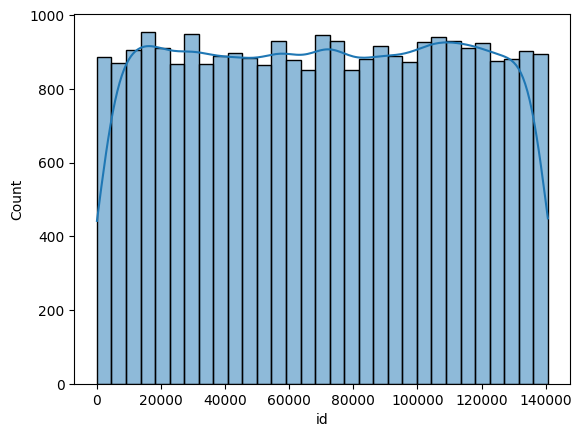

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


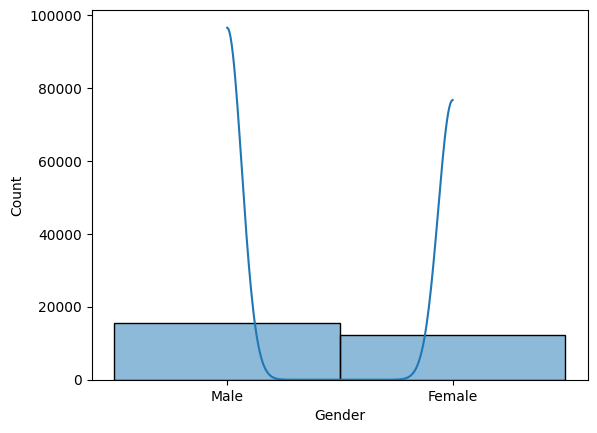

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


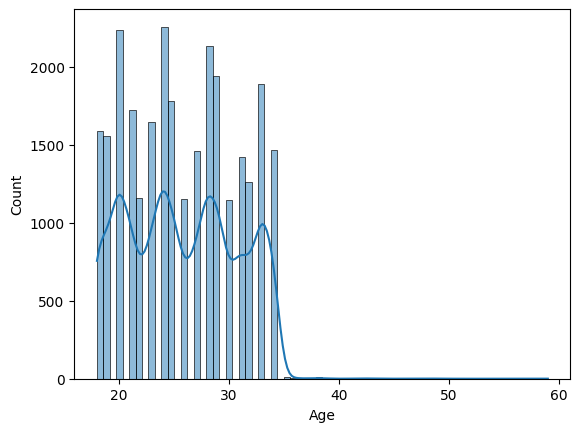

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


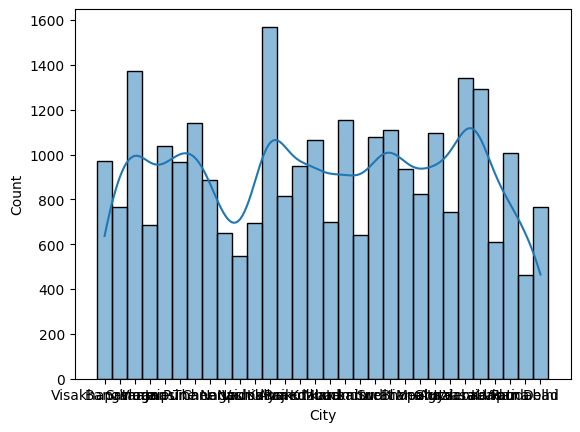

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


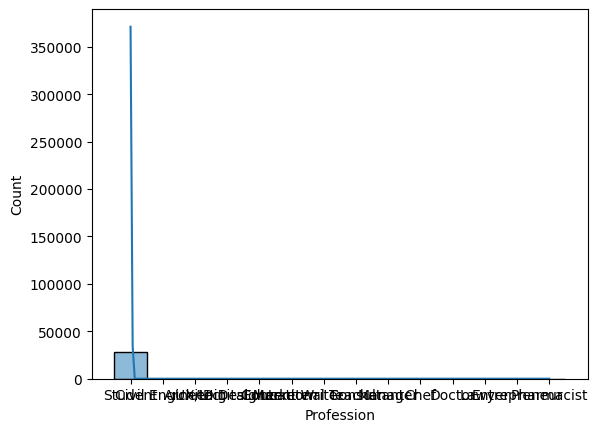

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


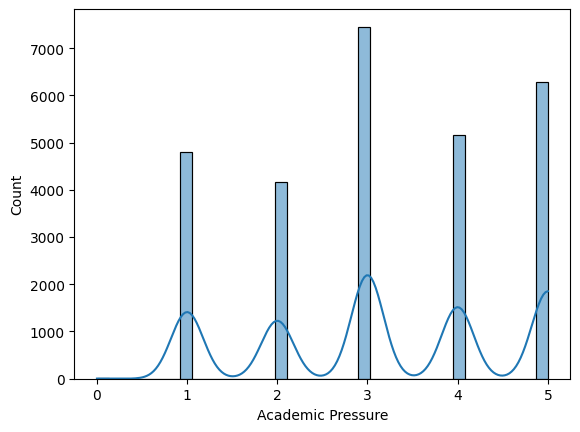

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


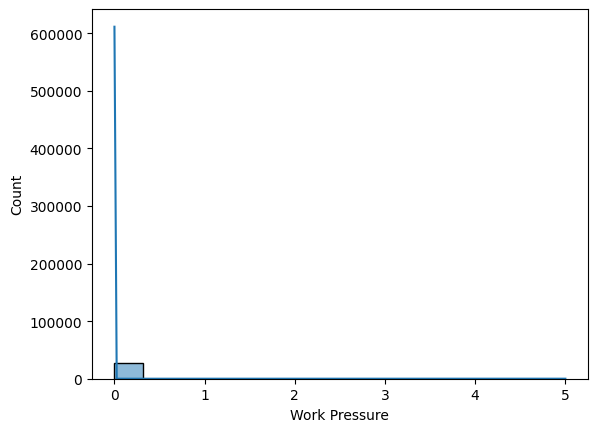

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


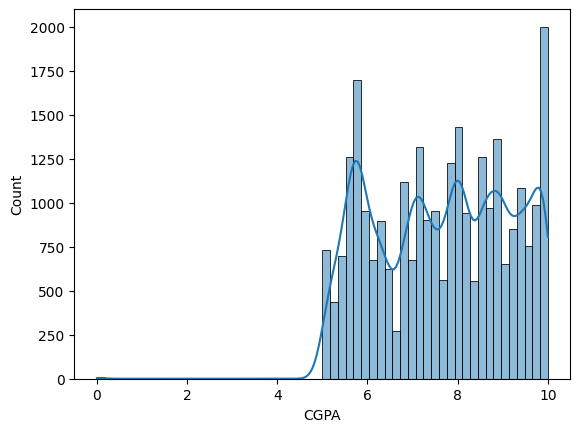

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


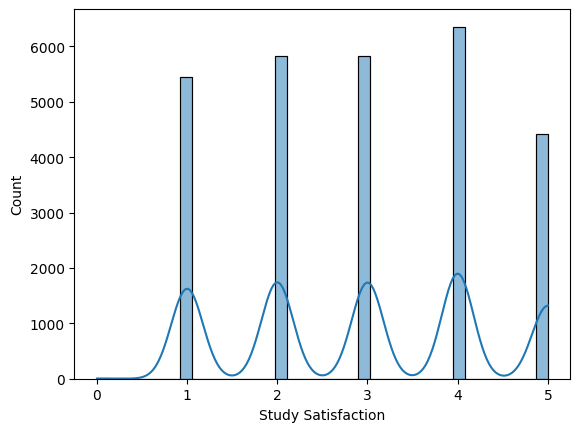

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


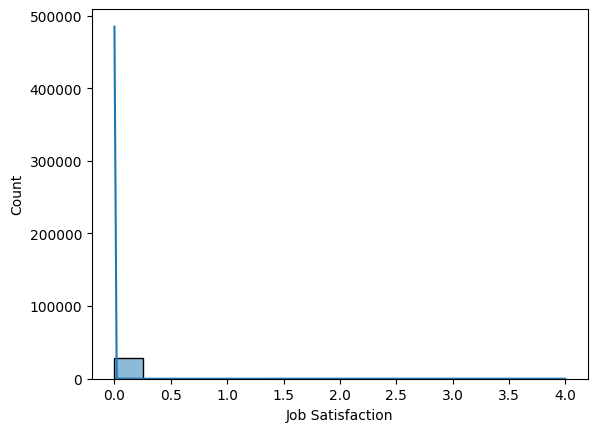

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


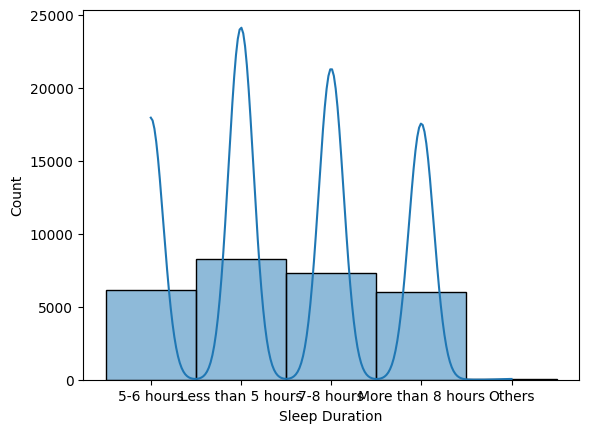

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


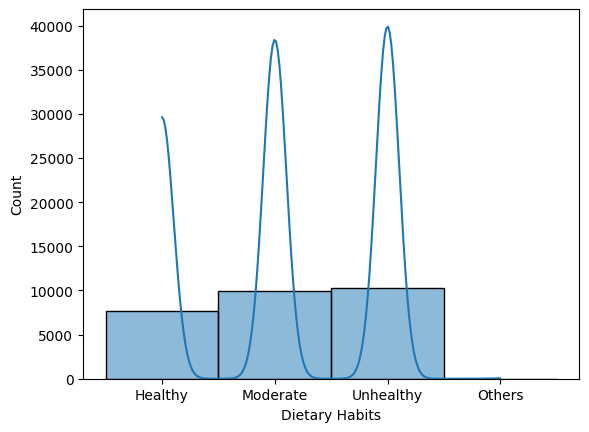

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


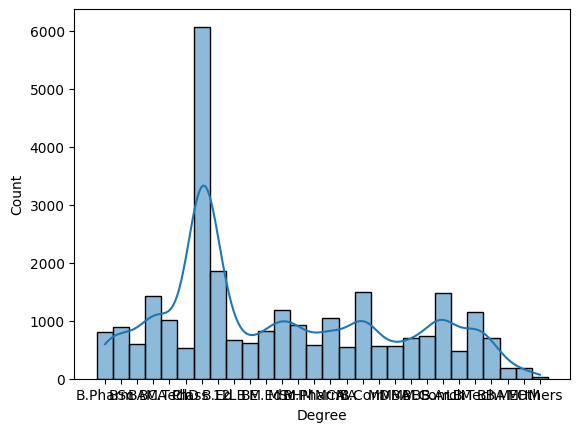

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


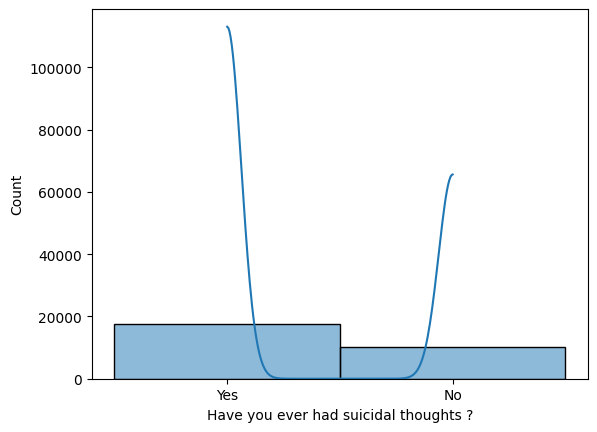

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


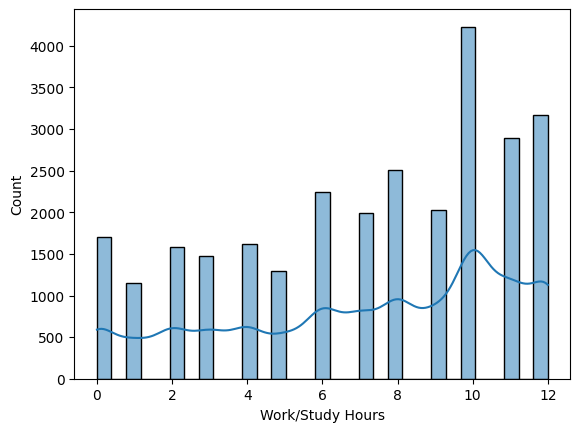

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


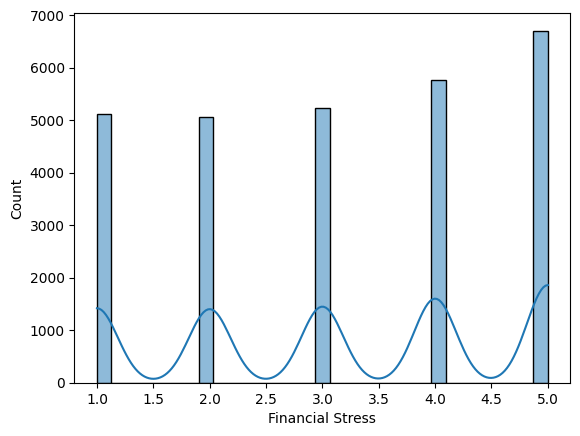

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


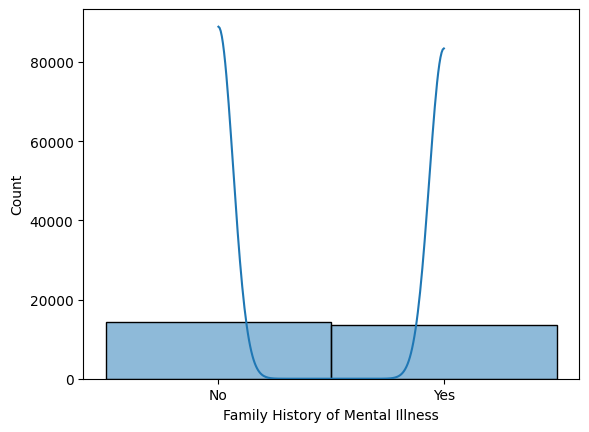

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


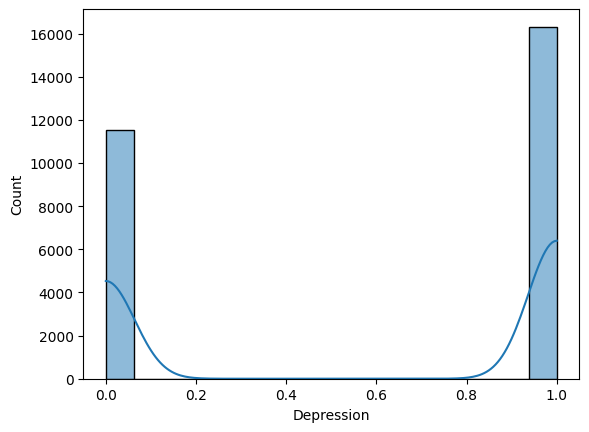

In [15]:
for column in data.columns:
    sea.histplot(data[column], kde=True)
    plt.show()

Now i will be drawing the box plots for the columns to identify if they have any outliers or not. 

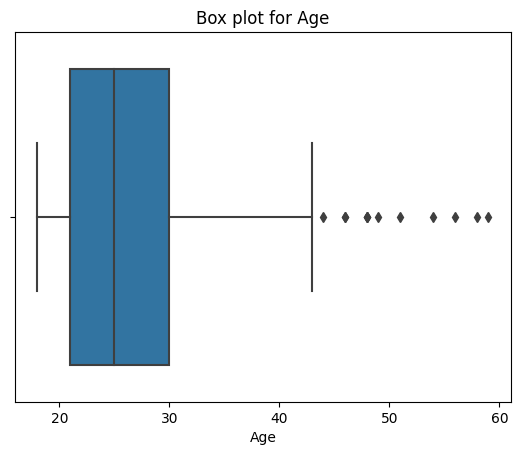

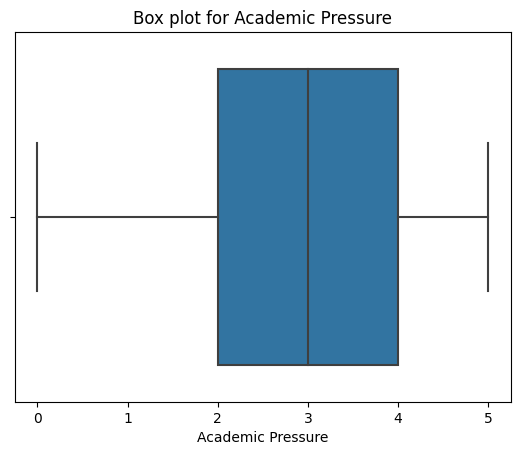

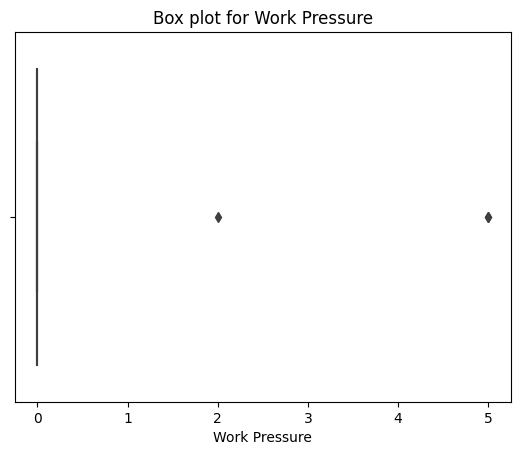

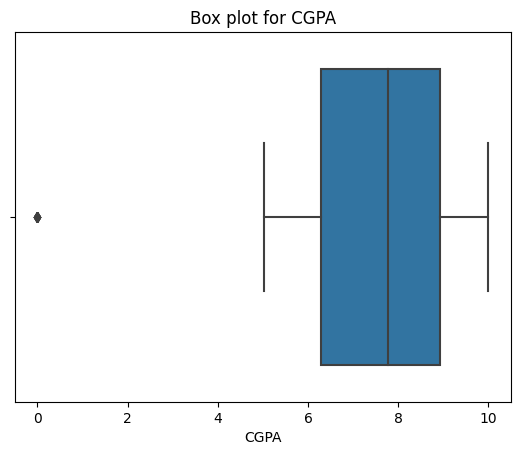

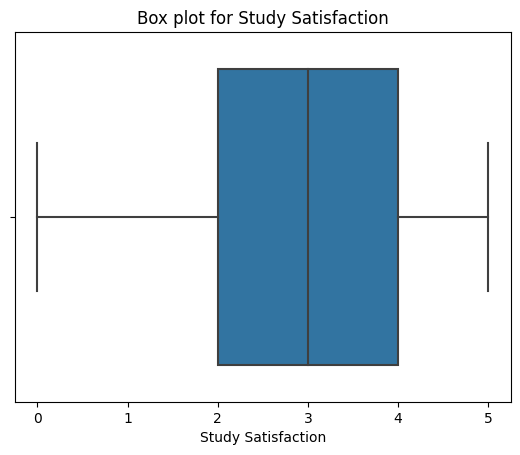

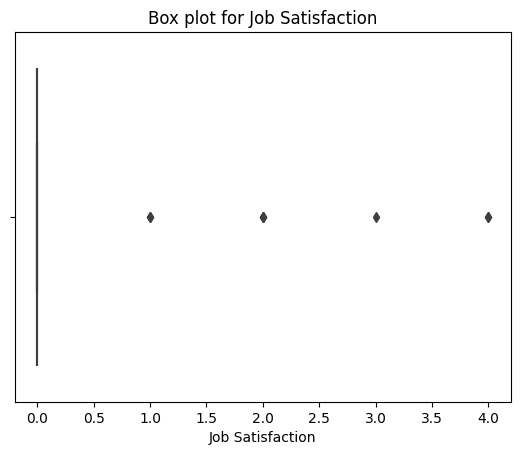

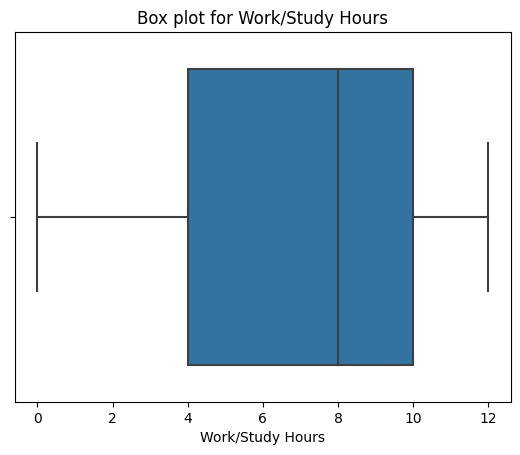

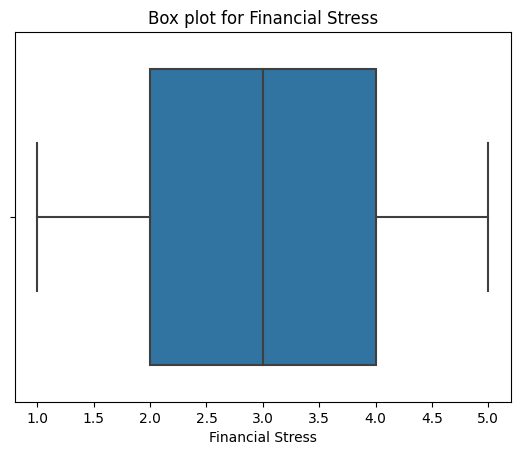

In [16]:
boxplot_columns = ['Age','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Work/Study Hours','Financial Stress']
for column in boxplot_columns:
    sea.boxplot(x=data[column])
    plt.xlabel(f"{column}")
    plt.title(f"Box plot for {column}")
    plt.show()

Since the Age column has outliers i have only considered the values whoch are lesser than 30 and ignored the values which are greater than 30. Afterwards I have drawn the new box plot which is as below without outliers. 

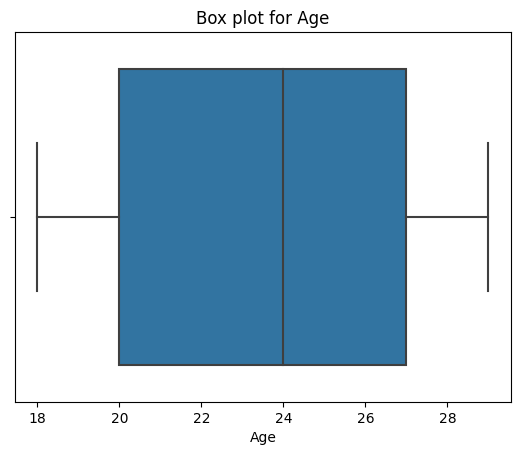

In [17]:
data = data[data['Age'] < 30]
sea.boxplot(x=data['Age'])
plt.xlabel("Age")
plt.title("Box plot for Age")
plt.show()

Also the columns Profession and Work Pressure have many outliers and most of the values of them are zero as this is a student depression dataset.

In [18]:
data['Profession'].value_counts()

Profession
Student             20613
Architect               6
Teacher                 5
Digital Marketer        3
Chef                    2
Civil Engineer          1
Content Writer          1
Manager                 1
Lawyer                  1
Doctor                  1
Entrepreneur            1
Pharmacist              1
Name: count, dtype: int64

In [19]:
data['Work Pressure'].value_counts()

Work Pressure
0.0    20634
2.0        1
5.0        1
Name: count, dtype: int64

now I have identified all the columns that are in type nominal(objects) and they are added to a list called object_column.

In [20]:
object_columns = data.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')


I considered Label Encoding, One hot encoding  and ordinal encoding but since most of the data are  nominal without any order I thought of using the Label Encoder to encode the data. One hot encoding will create more and more columns and will increase the data set size and ordinal encoding was ignored because there is no order in the datasets even in the degree dataset due to similar degree it is difficult to create an order. Therefore the best encoding was Label encoding. 

In [21]:
from sklearn.preprocessing import LabelEncoder

for column in object_columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    

In [22]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,8,0,24.0,2,10,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
3,30,0,28.0,27,10,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,10,10,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0
5,33,1,29.0,21,10,2.0,0.0,5.70,3.0,0.0,2,0,27,0,4.0,1.0,0,0
8,59,1,28.0,18,10,3.0,0.0,9.79,1.0,0.0,1,1,2,1,12.0,3.0,0,1


Due to ID being a unique value without any importnace for the predicition I have dropped the ID column. As I checked before the Work Pressure and Profession columns also have many outliers that affect the result as a result I have ignored the 2 columns also from the dataset.  

In [23]:
data = data.drop(['id','Work Pressure','Profession'],axis = 1)
data

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,0,24.0,2,2.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
3,0,28.0,27,3.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,0,25.0,10,4.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0
5,1,29.0,21,2.0,5.70,3.0,0.0,2,0,27,0,4.0,1.0,0,0
8,1,28.0,18,3.0,9.79,1.0,0.0,1,1,2,1,12.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,1,23.0,23,3.0,6.00,2.0,0.0,3,0,20,1,12.0,4.0,0,0
27896,0,27.0,24,5.0,5.75,5.0,0.0,0,3,11,1,7.0,1.0,1,0
27897,1,27.0,15,2.0,9.40,3.0,0.0,2,0,25,0,0.0,3.0,1,0
27899,0,18.0,15,5.0,6.88,2.0,0.0,2,0,11,1,10.0,5.0,0,1


I have used a correlation heatmap to visually represents the relationships between variables, making it easier to detect positive, negative, or no correlation. It is especially useful for feature selection by identifying multicollinearity, redundancy, or unexpected relationships in the data

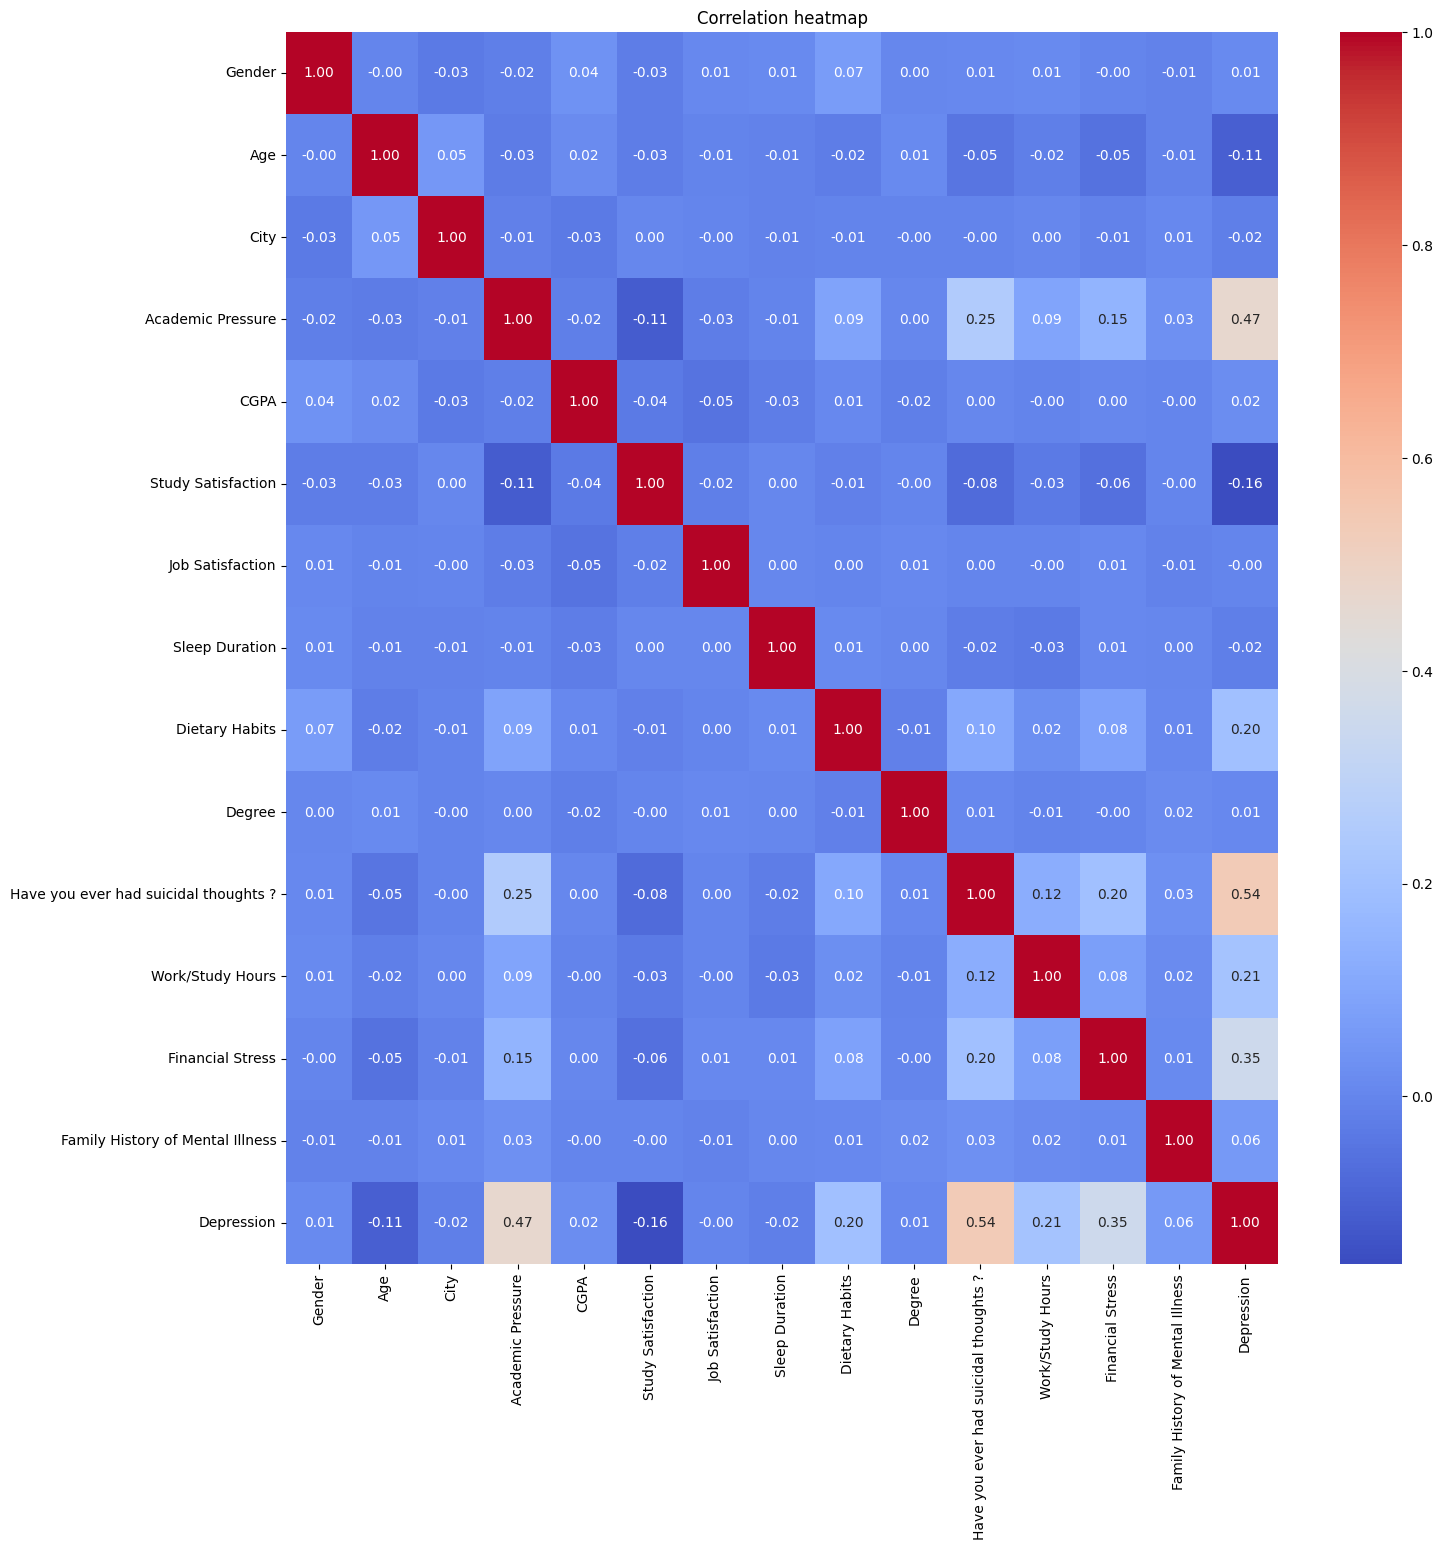

In [24]:
plt.figure(figsize=(16, 16))
sea.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

Here i can see that Have you ever had suicidal thoughts and Academic pressure columns have more correlation towards the positive side. Also the Job Satisfaction has 0 Correlation with the target as a result I have removed it from the X variable.

In [25]:
X = data.drop(columns=["Depression","Job Satisfaction"])
y = data["Depression"]

I have assigned the features except the Job satisfaction to X and target to y

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14445, 13)
(14445,)
(6191, 13)
(6191,)


I have split the dataset to training and testing as 70% for training and 30% for testing

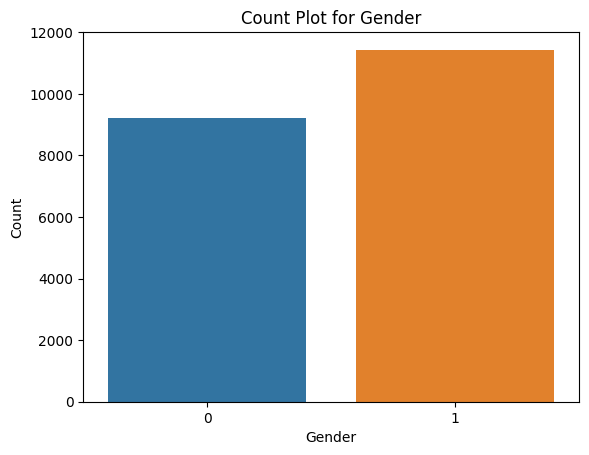

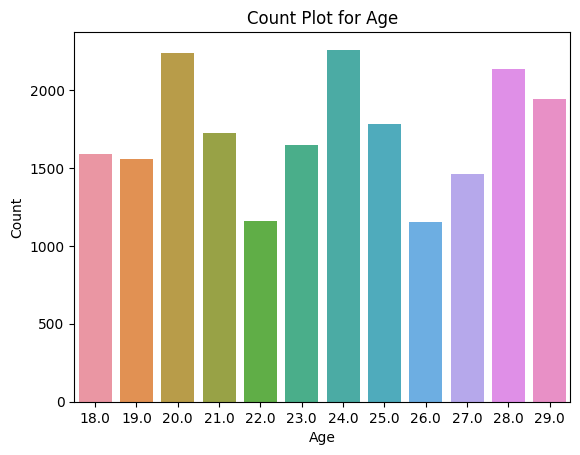

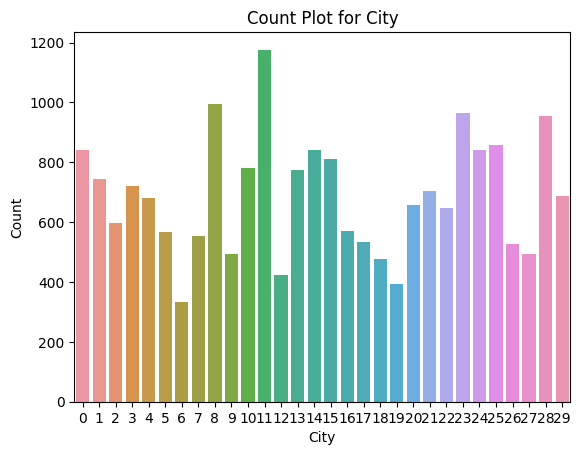

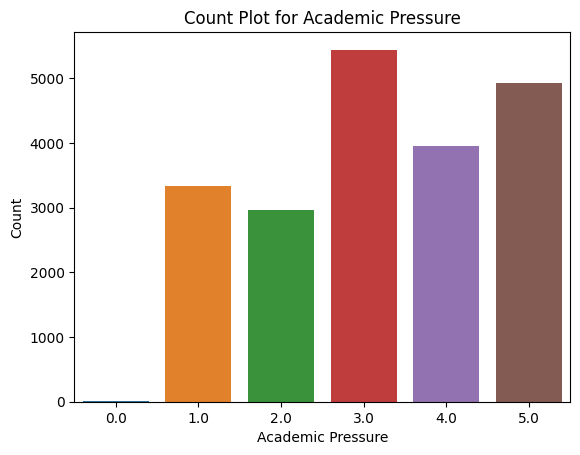

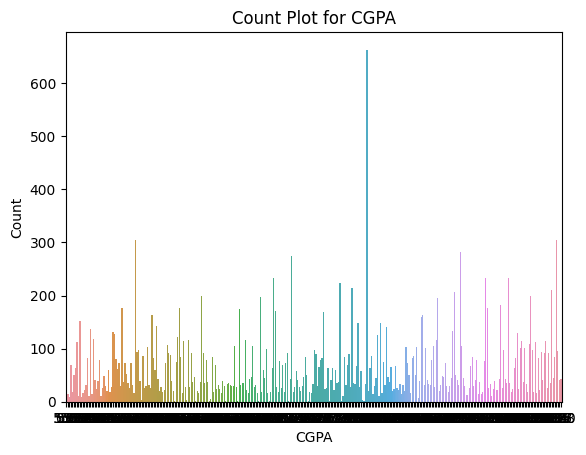

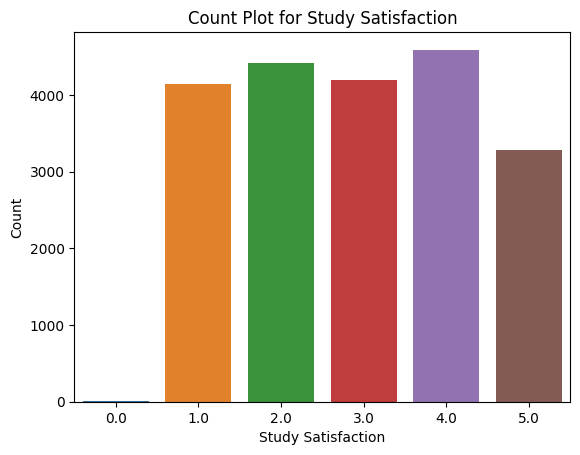

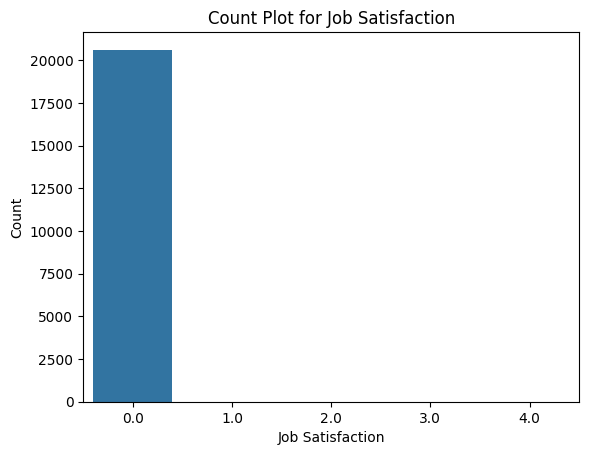

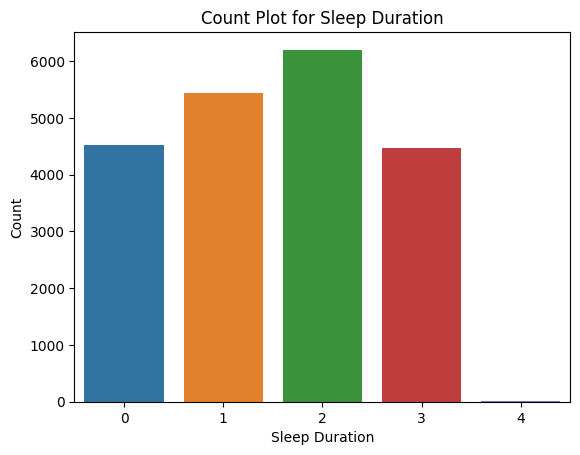

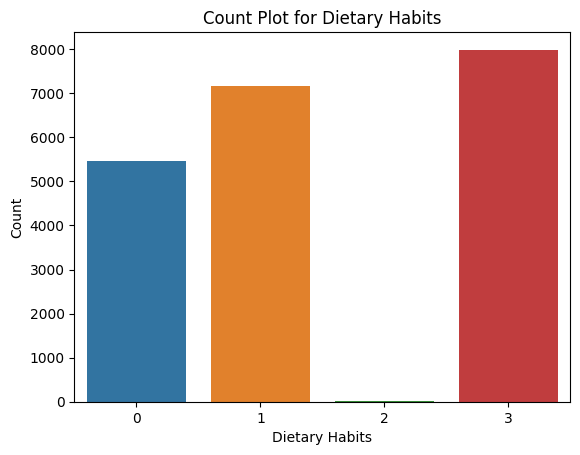

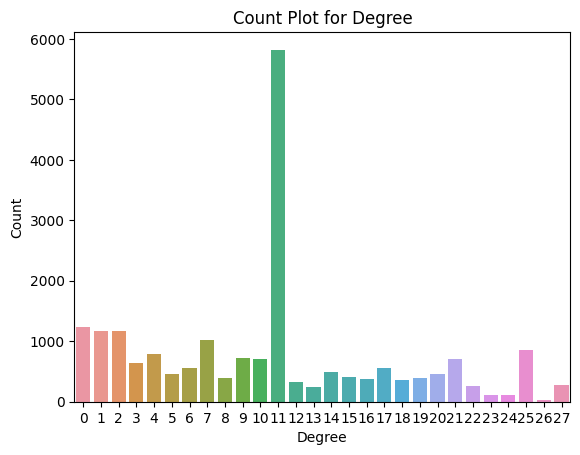

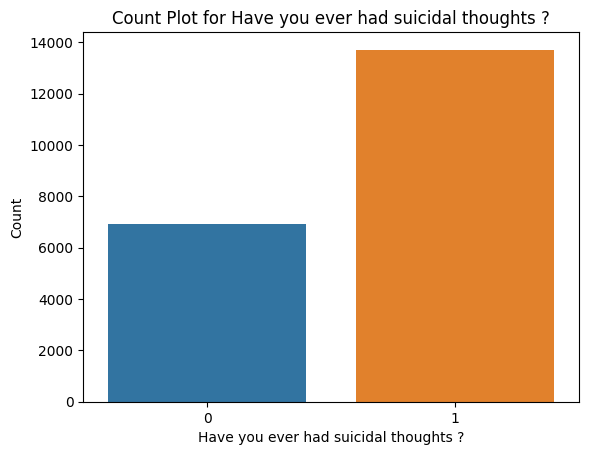

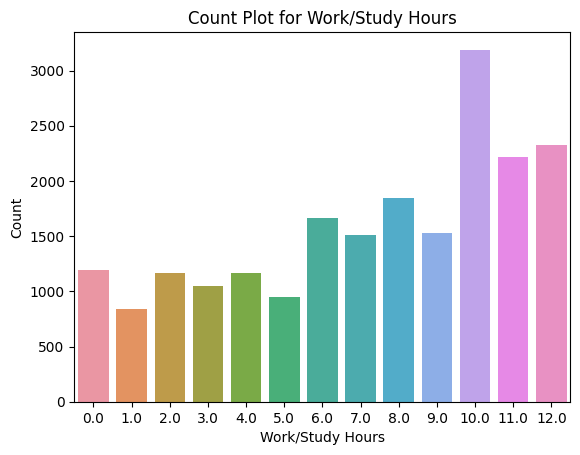

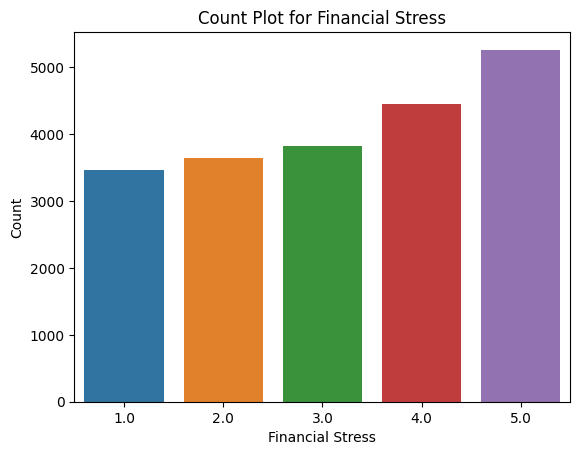

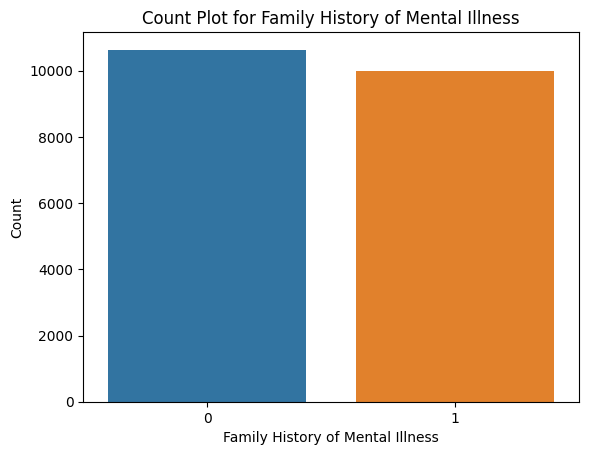

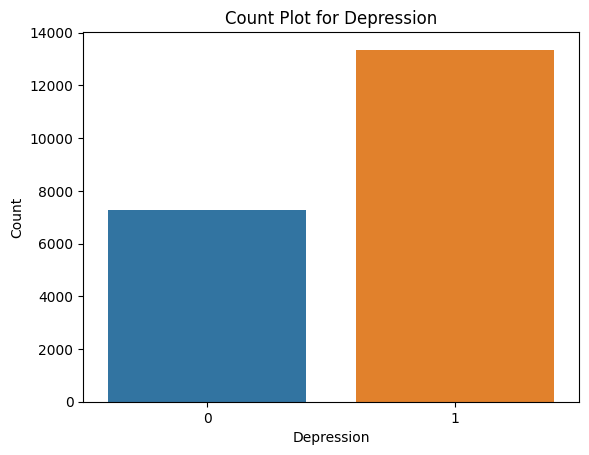

In [29]:
for column in data.columns:
    sea.countplot(x=data[column])
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.title(f'Count Plot for {column}')
    plt.show()


Since the dataset is a binary classification and contain 27000 data I have choosen these models.   1. Logistic Regression is ideal for interpreting linear relationships between features and the target. 
2.Random Forest and XGBoost are robust for handling mixed data types, capturing complex patterns, and efficiently managing large datasets. 
3.AdaBoost excels at improving classification for challenging cases and is resistant to overfitting, 4.Multi-Layer Perceptron (MLP) effectively models non-linear relationships in the data. These models collectively balance interpretability, complexity handling, and efficiency, making them well-suited for this problem.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [31]:
models = {
    "Logistic Regression":LogisticRegression(random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=100,random_state=42),
    "Ada Boost":AdaBoostClassifier(random_state=42),
    "Multi Layer Perceptron":MLPClassifier(hidden_layer_sizes=(100,),random_state=42, max_iter=300),
    "XG Boost":XGBClassifier(random_state=42)
}

In [32]:
cv_score = {}
best_models = []
for modelname,model in models.items():
    print(f"Training {modelname} with default parameters...")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    cv_score[modelname] = scores
    print(f" Cross-Validation Accuracy: {np.mean(scores)}")
    if np.mean(scores) > 0.8:
        best_models.append(modelname)

Training Logistic Regression with default parameters...


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

 Cross-Validation Accuracy: 0.8499826929733472
Training Random Forest with default parameters...
 Cross-Validation Accuracy: 0.8436829352717204
Training Ada Boost with default parameters...
 Cross-Validation Accuracy: 0.8491519556940117
Training Multi Layer Perceptron with default parameters...
 Cross-Validation Accuracy: 0.8456213222568362
Training XG Boost with default parameters...
 Cross-Validation Accuracy: 0.8359986154378678


In [33]:
#Logistic Regression: Achieved the highest cross-validation accuracy of 84.99%, 
#indicating its strength in capturing linear relationships effectively.

#Random Forest: With an accuracy of 84.36%, it shows robustness 
#in handling feature interactions and mixed data types.

#AdaBoost: Performed well with 84.91% accuracy, demonstrating 
#its ability to focus on hard-to-classify instances.

#Multi-Layer Perceptron: Achieved 84.56% accuracy, showcasing 
#its capability in modeling non-linear patterns in the data.

#XGBoost: Recorded an accuracy of 83.60%, balancing efficiency and 
#complexity with slightly lower performance than other models.

In [34]:
from sklearn.metrics import confusion_matrix

for modelname,model in models.items():
    print(f'{modelname}')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

Logistic Regression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8396058795025036
Confusion Matrix:
[[1600  584]
 [ 409 3598]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      2184
           1       0.86      0.90      0.88      4007

    accuracy                           0.84      6191
   macro avg       0.83      0.82      0.82      6191
weighted avg       0.84      0.84      0.84      6191

Random Forest
Accuracy: 0.8392828299143918
Confusion Matrix:
[[1597  587]
 [ 408 3599]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      2184
           1       0.86      0.90      0.88      4007

    accuracy                           0.84      6191
   macro avg       0.83      0.81      0.82      6191
weighted avg       0.84      0.84      0.84      6191

Ada Boost
Accuracy: 0.841867226619286
Confusion Matrix:
[[1617  567]
 [ 412 3595]]
Classification Report:
              precision    recal

In [35]:
#Logistic Regression: Achieved an accuracy of 83.96%, 
#demonstrates better recall for class 1 (90%) than for class 0 (73%),
#Precision and F1-scores are balanced, 
#highlighting its capability to handle the binary classification task effectively.

#Random Forest: Recorded an accuracy of 83.93%, 
#Recall for class 1 (90%) is higher than for class 0 (73%), 
#It balances precision, recall, and F1-scores across both classes,
#making it reliable forABy classification.

#AdaBoost:Delivered the highest accuracy among the models at 84.19%, 
#Recall for class 1 remains strong at 90%, while recall for class 0 improves to 74%
#Precision, recall, and F1-scores are well-distributed, 
#making it highly effective for this dataset.

#Multi-Layer Perceptron (MLP): Achieved an accuracy of 83.86%
#It has a strong recall for class 1 (92%) and slightly lower recall for class 0 (69%)
#Precision and F1-scores reflect its ability to learn complex patterns in the data.


Since all the moodels similar accuracy I used all 5 of them to create an ensemble model to predict the outputs. Intention was to increase the accuracy.

In [36]:
best_models

['Logistic Regression',
 'Random Forest',
 'Ada Boost',
 'Multi Layer Perceptron',
 'XG Boost']

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

LR = LogisticRegression(random_state=42)
RF = RandomForestClassifier(n_estimators=100,random_state=42)
AB = AdaBoostClassifier(random_state=42)
MLP = MLPClassifier(hidden_layer_sizes=(100,),random_state=42, max_iter=300)
XG = XGBClassifier(random_state=42)

In [38]:
ensemble = VotingClassifier(
    estimators=[
        ('LR', LR),
        ('RF', RF),
        ('AB', AB),
        ('MLP', MLP),
        ('XG',XG)
    ],
    voting='hard'  
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.8423518010014537
Confusion Matrix:
[[1595  589]
 [ 387 3620]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.77      2184
           1       0.86      0.90      0.88      4007

    accuracy                           0.84      6191
   macro avg       0.83      0.82      0.82      6191
weighted avg       0.84      0.84      0.84      6191



In [39]:
#Ensemble Model: Achieved an accuracy of 84.24%, indicating strong overall performance, 
#Recall for class 1 is high at 90%, demonstrating the model's effectiveness in identifying positives, 
#while class 0 recall is 73%, showing minor limitations in detecting negatives.
#Precision and F1-scores are well-balanced across both classes, 
#highlighting the model's strength in combining predictions from multiple algorithms 
#for robust binary classification.